In [1]:
import sys
# from keras.models import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from sklearn import metrics
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

In [2]:
path="wisdm_sampled_segmented.h5"


In [3]:
f = h5py.File(path, 'r')
X = f.get('input')
y = f.get('label') 
X = np.array(X)
y = np.array(y)

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state = 1)

In [5]:
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.3, random_state = 1)

In [6]:
trainy_one_hot = to_categorical(y_train)
testy_one_hot = to_categorical(y_test)


In [7]:
X_train.shape, X_test.shape

((19495, 128, 3), (11936, 128, 3))

In [8]:
y_train.shape, y_test.shape

((19495,), (11936,))

In [9]:
trainy_one_hot.shape, testy_one_hot.shape

((19495, 6), (11936, 6))

In [10]:
testy_one_hot

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [11]:
def class_breakdown(data):
    # convert the numpy array into a dataframe
    df = pd.DataFrame(data)
    # group data by the class value and calculate the number of rows
    counts = df.groupby(0).size()
    # retrieve raw rows
    counts = counts.values
    # summarize
    for i in range(len(counts)):
        percent = counts[i] / len(df) * 100
        print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))

In [12]:
class_breakdown(y_train)

Class=1, total=3202, percentage=16.425
Class=2, total=3256, percentage=16.702
Class=3, total=3191, percentage=16.368
Class=4, total=3258, percentage=16.712
Class=5, total=3290, percentage=16.876
Class=6, total=3298, percentage=16.917


In [13]:
class_breakdown(y_test)

Class=1, total=1962, percentage=16.438
Class=2, total=2004, percentage=16.790
Class=3, total=2063, percentage=17.284
Class=4, total=1978, percentage=16.572
Class=5, total=1955, percentage=16.379
Class=6, total=1974, percentage=16.538


In [14]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], trainy_one_hot.shape[1]

In [15]:
n_timesteps, n_features, n_outputs

(128, 3, 6)

In [16]:
sys.path.append("..//Base_Models")

In [17]:
import seaborn as sns
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
from model1 import cnn

In [19]:
m1=cnn(n_timesteps, n_features, n_outputs)

In [20]:
model1=m1.do_compile(X_train, X_test,trainy_one_hot,testy_one_hot,128)

Epoch 1/30
153/153 [==============================] - 48s 257ms/step - loss: 0.8265 - accuracy: 0.7836 - val_loss: 0.2573 - val_accuracy: 0.9030
Epoch 2/30
153/153 [==============================] - 31s 204ms/step - loss: 0.2051 - accuracy: 0.9220 - val_loss: 0.1822 - val_accuracy: 0.9300
Epoch 3/30
153/153 [==============================] - 25s 162ms/step - loss: 0.1367 - accuracy: 0.9462 - val_loss: 0.1280 - val_accuracy: 0.9527
Epoch 4/30
153/153 [==============================] - 30s 196ms/step - loss: 0.1007 - accuracy: 0.9625 - val_loss: 0.1644 - val_accuracy: 0.9357
Epoch 5/30
153/153 [==============================] - 28s 182ms/step - loss: 0.0812 - accuracy: 0.9699 - val_loss: 0.1537 - val_accuracy: 0.9450
Epoch 6/30
153/153 [==============================] - 38s 252ms/step - loss: 0.0658 - accuracy: 0.9749 - val_loss: 0.1301 - val_accuracy: 0.9518
Epoch 7/30
153/153 [==============================] - 31s 206ms/step - loss: 0.0456 - accuracy: 0.9828 - val_loss: 0.0962 - val_ac

In [30]:
predy=m1.prediction(X_test)
cm=confusion_matrix(y_test,predy)
print(cm)
print(acc(y_test,predy))
print("classification_report of model1:")
print(classification_report(y_test,predy))
sns.heatmap(cm, annot=True)

[[1937    2    5    6    0    0]
 [   3 1624    2    3    0    0]
 [   2    6  578   19    1    0]
 [   2    1   25  421    0    1]
 [   0    0    0    1  275    0]
 [   0    0    1    0    3  230]]
0.9838772338772339
classification_report of model1:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1950
         1.0       0.99      1.00      0.99      1632
         2.0       0.95      0.95      0.95       606
         3.0       0.94      0.94      0.94       450
         4.0       0.99      1.00      0.99       276
         5.0       1.00      0.98      0.99       234

    accuracy                           0.98      5148
   macro avg       0.98      0.98      0.98      5148
weighted avg       0.98      0.98      0.98      5148



<AxesSubplot:>

In [38]:
model1.save("Models_h5//model1.h5")

In [22]:
from model2 import cnn_lstm

In [23]:
m2=cnn_lstm(n_timesteps, n_features, n_outputs)

In [24]:
model2=m2.do_compile(X_train,X_test,trainy_one_hot,testy_one_hot)

Epoch 1/30
305/305 [==============================] - 49s 137ms/step - loss: 0.5443 - accuracy: 0.8076 - val_loss: 0.2428 - val_accuracy: 0.9170
Epoch 2/30
305/305 [==============================] - 36s 118ms/step - loss: 0.2087 - accuracy: 0.9219 - val_loss: 0.1495 - val_accuracy: 0.9411
Epoch 3/30
305/305 [==============================] - 54s 176ms/step - loss: 0.1510 - accuracy: 0.9443 - val_loss: 0.1176 - val_accuracy: 0.9548
Epoch 4/30
305/305 [==============================] - 36s 117ms/step - loss: 0.1113 - accuracy: 0.9599 - val_loss: 0.1171 - val_accuracy: 0.9533
Epoch 5/30
305/305 [==============================] - 41s 136ms/step - loss: 0.1021 - accuracy: 0.9631 - val_loss: 0.0986 - val_accuracy: 0.9653
Epoch 6/30
305/305 [==============================] - 47s 154ms/step - loss: 0.0847 - accuracy: 0.9705 - val_loss: 0.0901 - val_accuracy: 0.9700
Epoch 7/30
305/305 [==============================] - 43s 142ms/step - loss: 0.0756 - accuracy: 0.9733 - val_loss: 0.0816 - val_ac

[[1955    3    2    2    0    0]
 [   4 1987    7    6    0    0]
 [   7    4 1943  106    3    0]
 [   9    0   97 1870    2    0]
 [   0    0    1    0 1951    3]
 [   0    0    0    0    2 1972]]
0.9783847184986595
classification_report of model2:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1962
         1.0       1.00      0.99      0.99      2004
         2.0       0.95      0.94      0.94      2063
         3.0       0.94      0.95      0.94      1978
         4.0       1.00      1.00      1.00      1955
         5.0       1.00      1.00      1.00      1974

    accuracy                           0.98     11936
   macro avg       0.98      0.98      0.98     11936
weighted avg       0.98      0.98      0.98     11936



<AxesSubplot:>

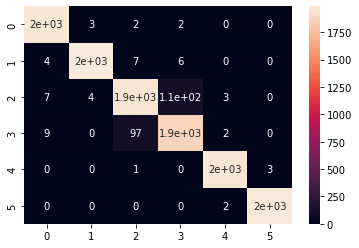

In [25]:
predy=m2.prediction(X_test)
cm=confusion_matrix(y_test,predy)
print(cm)
print(acc(y_test,predy))
print("classification_report of model2:")
print(classification_report(y_test,predy))
sns.heatmap(cm, annot=True)

In [26]:
model2.save("Models_h5//model2.h5")

In [32]:
from model3 import Conv_LSTM

In [33]:
m3=Conv_LSTM(n_timesteps, n_features, n_outputs)

In [35]:
model3=m3.do_compile(X_train,X_test,trainy_one_hot,testy_one_hot)

Trial 10 Complete [00h 02m 38s]
val_accuracy: 0.9567694664001465

Best val_accuracy So Far: 0.9663203954696655
Total elapsed time: 00h 28m 23s
INFO:tensorflow:Oracle triggered exit


Epoch 11/30
610/610 [==============================] - 19s 25ms/step - loss: 0.0695 - accuracy: 0.9759 - val_loss: 0.1238 - val_accuracy: 0.9572
Epoch 12/30
610/610 [==============================] - 15s 25ms/step - loss: 0.0726 - accuracy: 0.9755 - val_loss: 0.0927 - val_accuracy: 0.9691
Epoch 13/30
610/610 [==============================] - 15s 25ms/step - loss: 0.0538 - accuracy: 0.9825 - val_loss: 0.1271 - val_accuracy: 0.9622
Epoch 14/30
610/610 [==============================] - 16s 26ms/step - loss: 0.0562 - accuracy: 0.9808 - val_loss: 0.0999 - val_accuracy: 0.9704
Epoch 15/30
610/610 [==============================] - 16s 26ms/step - loss: 0.0458 - accuracy: 0.9841 - val_loss: 0.0977 - val_accuracy: 0.9691
Epoch 16/30
610/610 [==============================] - 17s 28ms/step - loss: 0.0449 - accuracy: 0.9846 - val_loss: 0.1313 - val_accuracy: 0.9628
Epoch 17/30
610/610 [==============================] - 18s 29ms/step - loss: 0.0535 - accuracy: 0.9830 - val_loss: 0.1200 - val_ac

[[1935    3   11   13    0    0]
 [   1 1991   10    1    1    0]
 [   4    5 1934  115    4    1]
 [   1    2  133 1842    0    0]
 [   0    0    0    0 1947    8]
 [   0    1    2    0    3 1968]]
0.9732741286863271
classification_report of model3:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1962
         1.0       0.99      0.99      0.99      2004
         2.0       0.93      0.94      0.93      2063
         3.0       0.93      0.93      0.93      1978
         4.0       1.00      1.00      1.00      1955
         5.0       1.00      1.00      1.00      1974

    accuracy                           0.97     11936
   macro avg       0.97      0.97      0.97     11936
weighted avg       0.97      0.97      0.97     11936



<AxesSubplot:>

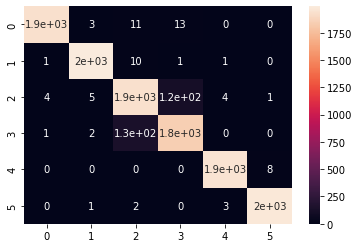

In [40]:
predy=m3.prediction(X_test)
cm=confusion_matrix(y_test,predy)
print(cm)
print(acc(y_test,predy))
print("classification_report of model3:")
print(classification_report(y_test,predy))
sns.heatmap(cm, annot=True)

In [39]:
model3.save("Models_h5//model3.h5")

In [27]:
from model4 import Layered_LSTM

In [28]:
m4=Layered_LSTM(n_timesteps, n_features, n_outputs)

In [29]:
model4=m4.do_compile(X_train,X_test,trainy_one_hot,testy_one_hot)

Epoch 1/30
305/305 [==============================] - 21s 55ms/step - loss: 0.5538 - accuracy: 0.7987 - val_loss: 0.5088 - val_accuracy: 0.8022
Epoch 2/30
305/305 [==============================] - 15s 51ms/step - loss: 0.3490 - accuracy: 0.8768 - val_loss: 0.3138 - val_accuracy: 0.8835
Epoch 3/30
305/305 [==============================] - 16s 51ms/step - loss: 0.2619 - accuracy: 0.9105 - val_loss: 0.1858 - val_accuracy: 0.9354
Epoch 4/30
305/305 [==============================] - 16s 51ms/step - loss: 0.2240 - accuracy: 0.9230 - val_loss: 0.6917 - val_accuracy: 0.8316
Epoch 5/30
305/305 [==============================] - 16s 51ms/step - loss: 0.1694 - accuracy: 0.9420 - val_loss: 0.1346 - val_accuracy: 0.9502
Epoch 6/30
305/305 [==============================] - 16s 51ms/step - loss: 0.1484 - accuracy: 0.9491 - val_loss: 0.1444 - val_accuracy: 0.9465
Epoch 7/30
305/305 [==============================] - 16s 52ms/step - loss: 0.1333 - accuracy: 0.9535 - val_loss: 0.1054 - val_accuracy:

[[1944    2    8    7    1    0]
 [   1 1987    7    6    2    1]
 [   0    2 1966   94    1    0]
 [   0    0   25 1952    1    0]
 [   0    1    0    0 1950    4]
 [   0    1    1    0    1 1971]]
0.9860924932975871
classification_report of model4:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1962
         1.0       1.00      0.99      0.99      2004
         2.0       0.98      0.95      0.97      2063
         3.0       0.95      0.99      0.97      1978
         4.0       1.00      1.00      1.00      1955
         5.0       1.00      1.00      1.00      1974

    accuracy                           0.99     11936
   macro avg       0.99      0.99      0.99     11936
weighted avg       0.99      0.99      0.99     11936



<AxesSubplot:>

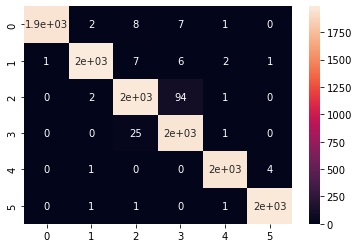

In [30]:
predy=m4.prediction(X_test)
cm=confusion_matrix(y_test,predy)
print(cm)
print(acc(y_test,predy))
print("classification_report of model4:")
print(classification_report(y_test,predy))
sns.heatmap(cm, annot=True)

In [31]:
model4.save("Models_h5//model4.h5")